Riesgo Bayes

'Umbral Bayes'

array([0.70273255])

'Umbral Riesgo:'

array([0.5])

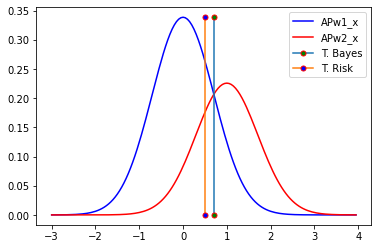

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm
from sklearn.neighbors import KernelDensity



# Generación de valores de la característica X
min_X=-3
max_X=4
delta=0.05
X=np.arange(min_X, max_X, delta)

# Class 1
# Obtain and Plot a normal distribution: p(x|w1)
Pw1=0.6 #Probabilidad apriori  Class 1
m1=0
sigm1=np.sqrt(1/2)
#A Posteriori Probability
APw1_x=norm.pdf(X,m1,sigm1)*Pw1 # Sin p(x)
plt.plot(X,APw1_x,color='blue')

# Class 2
# Obtain and Plot a normal distribution: p(x|w2)
Pw2=1-Pw1 #Probabilidad apriori  Class 2
m2=1
sigm2=np.sqrt(1/2)
#A Posteriori Probability
APw2_x=norm.pdf(X,m2,sigm2)*Pw2 # Sin p(x)
plt.plot(X,APw2_x,color='red')

# Umbral Óptimo - Mínimo error de clasificación Bayes
k1=np.log(Pw1/sigm1)-np.log(Pw2/sigm2)
k2=(m2**2/(2*sigm2**2))-(m1**2/(2*sigm1**2))
a=1/(2*sigm2**2)-1/(2*sigm1**2)
b=m1/(sigm1**2) - m2/(sigm2**2)
c1=k1+k2

# Obtener el umbral óptimo clasificación Bayes
polyn1 = [a, b, c1]

raiz1= np.roots(polyn1)

if raiz1.size ==1:
   X_umb_Bay=raiz1
else:
   min_m=min(m1,m2)   
   max_m=max(m1,m2)
   max_sigm=max(sigm1,sigm2)

   for i in raiz1:
     if  i >= (min_m-max_sigm)   and i<= (max_m +max_sigm) :
          X_umb_Bay=i
     else:
        X_umb_Bay=0

display("Umbral Bayes",X_umb_Bay)

# Visualizar el umbral

PA_max=max(np.amax(APw1_x),np.amax(APw2_x))
plt.plot([X_umb_Bay,X_umb_Bay ] , [0,PA_max ] , marker="o", markersize=5, markeredgecolor="red", markerfacecolor="green")

# Umbral Óptimo - Mínimo Riesgo Bayes

# Matriz de Pérdida
#L=np.array([[0,  0.5],[0.5, 0]]) 
L=np.array([[0,  0.6],[0.4, 0]]) 
#L=np.array([[0,  0.7],[0.3, 0]])
#L=np.array([[0,  0.8],[0.2, 0]]) 
#L=np.array([[0,  0.9],[0.1, 0]]) 

#L=np.array([[0,  0.4],[0.6, 0]]) 
#L=np.array([[0,  0.3],[0.7, 0]])
#L=np.array([[0,  0.2],[0.8, 0]]) 
#L=np.array([[0,  0.1],[0.9, 0]]) 

# Obtener el umbral Riesgo Bayes
c2=k2+np.log((L[1,0]-L[0,0])*Pw1/sigm1)-np.log((L[0,1]-L[1,1])*Pw2/sigm2)
polyn2 = [a, b, c2]

raiz2= np.roots(polyn2)

if raiz2.size ==1:
   X_umb_Ris=raiz2
else:
   min_m=min(m1,m2)   
   max_m=max(m1,m2)
   max_sigm=max(sigm1,sigm2)
   for i in raiz2:
     if  i >= (min_m-max_sigm)  and i<= (max_m+max_sigm) :
          X_umb_Ris=i
     else:
        X_umb_Ris=0

# Visualizar el umbral
display('Umbral Riesgo:',X_umb_Ris)

plt.plot([X_umb_Ris,X_umb_Ris ] , [0,PA_max ] , marker="o", markersize=5, markeredgecolor="red", markerfacecolor="b")
plt.legend(['APw1_x', 'APw2_x','T. Bayes', 'T. Risk'])

plt.show()
